In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [83]:
def Lucas_kanade(frame1,frame2_vis):
    if frame1 is None or frame2_vis is None:
        raise ValueError("One or both frames are empty!")

    frame1=cv2.resize(frame1,(1000,800))
    frame2_vis=cv2.resize(frame2_vis,(1000,800))
    
    frame2_vis = cv2.resize(frame2_vis, (frame1.shape[1], frame1.shape[0]))
    frame1=cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY) if len(frame1.shape) == 3 else frame1 
    frame2=cv2.cvtColor(frame2_vis,cv2.COLOR_BGR2GRAY) if len(frame2_vis.shape) == 3 else frame2

    dst1=cv2.cornerHarris(frame1, blockSize=2, ksize=3, k=0.04)
    dst1=cv2.dilate(dst1,None)
    
    thresh=0.01*dst1.max()
    features=np.argwhere(dst1>thresh)
    features=np.flip(features,axis=1)
    
    features=np.float32(features).reshape(-1,1,2)
    
    if features is None or len(features) == 0:
        raise ValueError("No keypoints detected!")
    new_features, status, err = cv2.calcOpticalFlowPyrLK(frame1, frame2, features, None)

    new_features = new_features[status == 1]
    features = features[status == 1]

    motion_threshold = .5  
    max_motion = 50
    
    for i, (new, old) in enumerate(zip(new_features, features)):
        if status[i]: 
            x_new, y_new = new.ravel()
            x_old, y_old = old.ravel()
            displacement = np.linalg.norm(new - old)
            if motion_threshold < displacement < max_motion:
                cv2.arrowedLine(frame2_vis, (int(x_old), int(y_old)), (int(x_new), int(y_new)), (0, 255, 0),1, tipLength=0.1)

    return frame2_vis,frame2

In [84]:
cap=cv2.VideoCapture(r"C:\Users\admin\Downloads\vecteezy_car-and-truck-traffic-on-the-highway-in-europe-poland_7957364.mp4")
ret,frame1=cap.read()
frame1=cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
while cap.isOpened():
    ret,frame2=cap.read()
    if not ret:
        print("Image not loadded")
        break
    frame2_vis,frame2_gray=Lucas_kanade(frame1,frame2)
    
    cv2.imshow('Optical Flow',frame2_vis)
    if cv2.waitKey(30) & 0xFF == 27:
        break
    frame1=frame2_gray
cap.release()
cv2.destroyAllWindows()

(-0.5, 499.5, 499.5, -0.5)

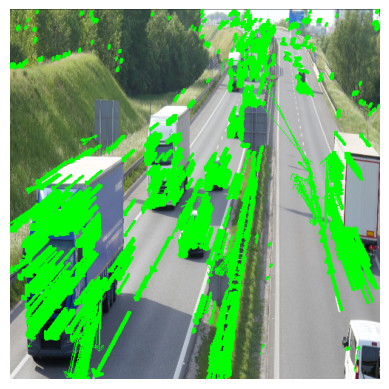

In [67]:
im1=cv2.imread(r"C:\Users\admin\Pictures\Screenshots\Screenshot 2025-04-03 112035.png")
im2=cv2.imread(r"C:\Users\admin\Pictures\Screenshots\Screenshot 2025-04-03 112053.png")

vis,frame2=Lucas_kanade(im1,im2)
vis=cv2.cvtColor(vis,cv2.COLOR_BGR2RGB)
plt.imshow(vis)
plt.axis('off')